In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
df = pd.read_csv("/Users/Chathu/Downloads/train.csv")
df.head(5)


,age,workclass,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,income50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


<AxesSubplot:xlabel='age'>

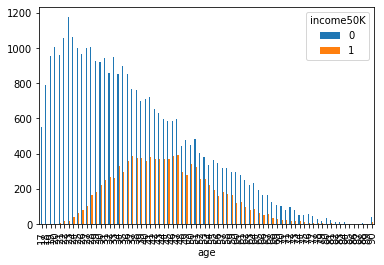

In [85]:
pd.crosstab(df.age,df.income50K).plot(kind='bar')

In [5]:
df.drop(['workclass','fnlwgt','education','occupation','race','gender','nativecountry'],axis='columns',inplace=True)
df.head()

,age,educationalnum,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,income50K
0,67,16,Divorced,Not-in-family,99999,0,60,1
1,17,8,Never-married,Own-child,0,0,15,0
2,31,13,Married-civ-spouse,Husband,0,0,40,1
3,58,4,Married-civ-spouse,Husband,0,0,40,0
4,25,10,Never-married,Not-in-family,0,0,40,0


In [6]:
inputs = df.drop('income50K',axis='columns')
target = df.income50K

In [8]:
dummies = pd.get_dummies(inputs.maritalstatus)
dummies.head(3)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0


In [9]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,age,educationalnum,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,67,16,Divorced,Not-in-family,99999,0,60,1,0,0,0,0,0,0
1,17,8,Never-married,Own-child,0,0,15,0,0,0,0,1,0,0
2,31,13,Married-civ-spouse,Husband,0,0,40,0,0,1,0,0,0,0


In [12]:
#inputs.drop(['Married-spouse-absent'],axis='columns',inplace=True)
inputs.head(3)

,age,educationalnum,relationship,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Never-married
0,67,16,Not-in-family,99999,0,60,1,0,0
1,17,8,Own-child,0,0,15,0,0,1
2,31,13,Husband,0,0,40,0,0,0


In [13]:
dummies = pd.get_dummies(inputs.relationship)
dummies.head(3)

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0


In [15]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,age,educationalnum,relationship,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Never-married,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,67,16,Not-in-family,99999,0,60,1,0,0,0,1,0,0,0,0
1,17,8,Own-child,0,0,15,0,0,1,0,0,0,1,0,0
2,31,13,Husband,0,0,40,0,0,0,1,0,0,0,0,0


In [16]:
inputs.drop(['relationship','Not-in-family','Other-relative','Wife'],axis='columns',inplace=True)
inputs.head(3)

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Never-married,Husband,Own-child,Unmarried
0,67,16,99999,0,60,1,0,0,0,0,0
1,17,8,0,0,15,0,0,1,0,1,0
2,31,13,0,0,40,0,0,0,1,0,0


In [17]:
inputs.drop(['Never-married'],axis='columns',inplace=True)

In [18]:
inputs.head(3)

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Husband,Own-child,Unmarried
0,67,16,99999,0,60,1,0,0,0,0
1,17,8,0,0,15,0,0,0,1,0
2,31,13,0,0,40,0,0,1,0,0


In [19]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(inputs))

In [23]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.684932,1.000000,1.0,0.0,0.602041,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.466667,0.0,0.0,0.142857,0.0,0.0,0.0,1.0,0.0
2,0.191781,0.800000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.3)

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
model.fit(X_train,y_train)

GaussianNB()

In [27]:
model.score(X_test,y_test)

0.8196845617227783

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.82515437, 0.8240169 , 0.82434189, 0.82499188, 0.81781245])

In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
model.score(X_test,y_test)

0.8257506824385805

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [33]:
model.score(X_test, y_test)

0.8378070973612375

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8328025477707006

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(learning_rate=0.01,random_state=41)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8384895359417652

In [41]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
testemp = pd.read_csv("/Users/Chathu/Downloads/test1.csv")
testemp.head(5)

,age,workclass,fnlwgt,education,educationalnum,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [58]:
testemp.drop(['workclass','fnlwgt','education','occupation','race','gender','nativecountry'],axis='columns',inplace=True)


In [59]:
testemp.head(5)

,age,educationalnum,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek
0,39,9,Married-civ-spouse,Husband,0,0,40
1,32,12,Married-civ-spouse,Husband,0,0,42
2,47,9,Married-civ-spouse,Husband,0,0,40
3,19,8,Never-married,Own-child,0,0,20
4,46,9,Married-civ-spouse,Husband,0,0,40


In [60]:
dummies1 = pd.get_dummies(testemp.maritalstatus)
dummies1.head(3)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0


In [61]:
dummies2 = pd.get_dummies(testemp.relationship)
dummies2.head(3)
Divorced	Married-spouse-absent	Husband	Own-child	Unmarried

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0


In [63]:
dummies1.drop(['Married-AF-spouse','Married-civ-spouse','Never-married','Separated','Widowed'],axis='columns',inplace=True)

In [64]:
dummies2.drop(['Not-in-family','Other-relative','Wife'],axis='columns',inplace=True)

In [66]:
testemp = pd.concat([testemp,dummies1],axis='columns')
testemp.head(3)

,age,educationalnum,maritalstatus,relationship,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Divorced,Married-spouse-absent
0,39,9,Married-civ-spouse,Husband,0,0,40,0,0,0,0
1,32,12,Married-civ-spouse,Husband,0,0,42,0,0,0,0
2,47,9,Married-civ-spouse,Husband,0,0,40,0,0,0,0


In [67]:
testemp.drop(['maritalstatus','relationship'],axis='columns',inplace=True)

In [68]:
testemp.head(3)
age	educationalnum	capitalgain	capitalloss	hoursperweek	Divorced	Married-spouse-absent	Husband	Own-child	Unmarried

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Divorced,Married-spouse-absent
0,39,9,0,0,40,0,0,0,0
1,32,12,0,0,42,0,0,0,0
2,47,9,0,0,40,0,0,0,0


In [69]:
testemp = pd.concat([testemp,dummies2],axis='columns')
testemp.head(3)

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Divorced,Married-spouse-absent,Divorced,Married-spouse-absent,Husband,Own-child,Unmarried
0,39,9,0,0,40,0,0,0,0,1,0,0
1,32,12,0,0,42,0,0,0,0,1,0,0
2,47,9,0,0,40,0,0,0,0,1,0,0


In [71]:
testemp.drop(['Divorced','Married-spouse-absent'],axis='columns',inplace=True)

In [76]:
testemp = pd.concat([testemp,dummies1],axis='columns')
testemp.head(3)

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Husband,Own-child,Unmarried,Divorced,Married-spouse-absent
0,39,9,0,0,40,1,0,0,0,0
1,32,12,0,0,42,1,0,0,0,0
2,47,9,0,0,40,1,0,0,0,0


In [80]:
testemp.head(3)

,age,educationalnum,capitalgain,capitalloss,hoursperweek,Husband,Own-child,Unmarried,Divorced,Married-spouse-absent
0,39,9,0,0,40,1,0,0,0,0
1,32,12,0,0,42,1,0,0,0,0
2,47,9,0,0,40,1,0,0,0,0


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X111=pd.DataFrame(scaler.fit_transform(testemp))

In [82]:
ans=model.predict(X111)

In [83]:
testemp['output']=pd.Series(ans)

In [84]:
testemp.to_csv("/Users/Chathu/Downloads/test1.csv",index=False)